# Modelling and insights

----------------------

### Importing stuff

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('train_cleaned_combined_airbnb.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
pd.options.display.max_columns = None

In [3]:
df.head()

,available,price,minimum_nights,maximum_nights,room_type,accomodates,bedrooms,beds,total_reviews,days_since_review,comment_length,days_since_joined,host_location_country,property_type_kind,no_of_bath,type_of_bath,number_of_amneties
0,0.0,166.666667,1.000000,60.0,Hotel room,2.0,1.0,1.0,2.0,1358.500000,255.500000,4234,Belgium,Private,1.0,Private,33
1,0.0,175.000000,1.666667,1125.0,Hotel room,2.0,1.0,1.0,2.0,619.000000,127.000000,4234,Belgium,Private,1.0,Private,31
2,1.0,215.000000,3.000000,1125.0,Entire home/apt,4.0,2.0,2.0,6.0,1694.500000,300.166667,4234,Belgium,Entire,1.5,Private,46
3,1.0,200.000000,2.000000,1125.0,Entire home/apt,4.0,2.0,2.0,15.0,1603.866667,362.866667,4234,Belgium,Entire,1.5,Private,44
4,1.0,150.000000,2.000000,1125.0,Entire home/apt,4.0,2.0,2.0,120.0,1540.908333,265.266667,3992,Belgium,Entire,2.5,Private,45


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   available              1699 non-null   float64
 1   price                  1699 non-null   float64
 2   minimum_nights         1699 non-null   float64
 3   maximum_nights         1699 non-null   float64
 4   room_type              1699 non-null   object 
 5   accomodates            1699 non-null   float64
 6   bedrooms               1699 non-null   float64
 7   beds                   1699 non-null   float64
 8   total_reviews          1699 non-null   float64
 9   days_since_review      1699 non-null   float64
 10  comment_length         1699 non-null   float64
 11  days_since_joined      1699 non-null   int64  
 12  host_location_country  1699 non-null   object 
 13  property_type_kind     1699 non-null   object 
 14  no_of_bath             1699 non-null   float64
 15  type

----------------

### Converting to categorical

In [5]:
df['available'] = pd.Categorical(df.available)
df['room_type'] = pd.Categorical(df.room_type)
df['host_location_country'] = pd.Categorical(df.host_location_country)
df['property_type_kind'] = pd.Categorical(df.property_type_kind)
df['type_of_bath'] = pd.Categorical(df.type_of_bath)
df['accomodates'] = pd.Categorical(df.accomodates)
df['bedrooms'] = pd.Categorical(df.bedrooms)
df['beds'] = pd.Categorical(df.beds)
df['no_of_bath'] = pd.Categorical(df.no_of_bath)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   available              1699 non-null   category
 1   price                  1699 non-null   float64 
 2   minimum_nights         1699 non-null   float64 
 3   maximum_nights         1699 non-null   float64 
 4   room_type              1699 non-null   category
 5   accomodates            1699 non-null   category
 6   bedrooms               1699 non-null   category
 7   beds                   1699 non-null   category
 8   total_reviews          1699 non-null   float64 
 9   days_since_review      1699 non-null   float64 
 10  comment_length         1699 non-null   float64 
 11  days_since_joined      1699 non-null   int64   
 12  host_location_country  1699 non-null   category
 13  property_type_kind     1699 non-null   category
 14  no_of_bath             1699 non-null   c

------------------

### Encoding 
The conversion to categorical columns will help.
- Here, we have decided to make certain column categorical, which could have been int.
- Let's see how that performs, and we can go back and change them to int, if we like.

In [7]:
df = pd.get_dummies(df)

--------------------

### Train Test Split 

In [8]:
from sklearn.model_selection import train_test_split
from math import sqrt

In [9]:
X = df.drop(['price'],axis=1)
y = df['price']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

---------------------------------

## Modelling

Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [12]:
reg = LinearRegression()
model = reg.fit(X_train, y_train)

In [13]:
model.score(X_train, y_train)

0.5032488603240926

Model has been trained
- We can see the intercept and the coefficients for the variables

In [14]:
# Intercept
model.intercept_

310.15212336260765

In [15]:
model.coef_

array([ 7.64596469e-02,  2.94674780e-04, -8.06299017e-02,  6.12480530e-03,
       -2.01088179e-02, -1.18823208e-02,  8.66377140e-02, -3.25441662e+00,
        8.37134725e+00,  2.58780863e+00, -7.70473926e+00, -1.99520173e+01,
        1.76070931e+01,  6.68300231e+00, -4.33807817e+00, -8.21749028e+01,
       -4.26000280e+01, -4.40150117e+01, -3.07139744e+01, -5.52631103e+01,
       -2.70945604e+01, -3.61438687e+01,  4.58592581e+01, -3.98477729e+01,
        4.69929238e+01, -1.71552149e+01, -7.37280383e+01, -9.99604018e+01,
       -9.36879723e+01,  5.49532675e+02,  7.37379304e+01,  1.02953671e+02,
        1.59680037e+02,  1.42499096e+02,  2.79359173e+02,  6.36428371e+02,
       -4.46257950e+02, -4.24900070e+01, -2.22568238e+02, -4.05719802e+02,
       -4.10134934e+01, -2.36608788e+02,  6.74181023e+01,  6.37736882e+01,
        6.40904262e+01,  4.48858191e+01,  4.24923932e+01,  4.36652671e+01,
        1.83464807e+02,  2.12228407e+01,  2.74631380e+02, -4.14665990e+02,
       -2.97805234e+01, -

Getting the predictions

In [16]:
predicted = model.predict(X_test)

Calculating the RMSE

In [17]:
mse = mean_squared_error(y_test, predicted)
mse

84361.31697412711

In [18]:
rmse = sqrt(mse)
rmse

290.45019706332977

So, this is our baseline score.
- This is what we got, without tinkering with any model settings
- Let's see if we can do better than that

In [19]:
# Making a Dataframe for scores
df_score = pd.DataFrame({"Linear Regression":[rmse]})
df_score

,Linear Regression
0,290.450197


---------------------

### Decision Tree Regressor

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
regressor = DecisionTreeRegressor(random_state=0)

In [22]:
model = regressor.fit(X_train, y_train)

In [23]:
model

DecisionTreeRegressor(random_state=0)

Getting the predictions

In [24]:
predicted = model.predict(X_test)

Calculating the RMSE

In [25]:
mse = mean_squared_error(y_test, predicted)
mse

91224.25751633986

In [26]:
rmse = sqrt(mse)
rmse

302.0335370721931

This is worse than our Linear regression. Let's try out some other options we have.

In [27]:
# Adding to the Dataframe for scores
df_score["Decision Tree"] = [rmse]
df_score

,Linear Regression,Decision Tree
0,290.450197,302.033537


---------------

### Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)

In [29]:
model = regr.fit(X_train, y_train)

In [30]:
model

RandomForestRegressor(max_depth=2, random_state=0)

Getting the predictions

In [31]:
predicted = model.predict(X_test)

Calculating the RMSE

In [32]:
mse = mean_squared_error(y_test, predicted)
mse

83339.69880146968

In [33]:
rmse = sqrt(mse)
rmse

288.68615969850316

Alright!. 
Better than Decision trees and a just a bit better than the Linear regression.

In [34]:
# Adding to the Dataframe for scores
df_score["Random Forest"] = [rmse]
df_score

,Linear Regression,Decision Tree,Random Forest
0,290.450197,302.033537,288.68616


---------------

### Gradient Boosting Regressor

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)

In [36]:
model = reg.fit(X_train, y_train)

In [37]:
model

GradientBoostingRegressor(random_state=0)

Getting the predictions

In [38]:
predicted = model.predict(X_test)

Calculating the RMSE

In [39]:
mse = mean_squared_error(y_test, predicted)
mse

82541.28005440168

In [40]:
rmse = sqrt(mse)
rmse

287.2999826912659

The best we have, but not that better than the rest.

In [41]:
# Adding to the Dataframe for scores
df_score["Gradient Boosting"] = [rmse]
df_score

,Linear Regression,Decision Tree,Random Forest,Gradient Boosting
0,290.450197,302.033537,288.68616,287.299983


---------------

### xgboost

In [42]:
import xgboost as xgb

In [43]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [44]:
xg_reg.fit(X_train,y_train)

[11:27:31] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=12,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

Getting the predictions

In [45]:
predicted = xg_reg.predict(X_test)

Calculating the RMSE

In [46]:
mse = mean_squared_error(y_test, predicted)
mse

89127.34250660092

In [47]:
rmse = sqrt(mse)
rmse

298.54202804061094

Not our best model yet.

In [48]:
# Adding to the Dataframe for scores
df_score["Xgboost"] = [rmse]
df_score

,Linear Regression,Decision Tree,Random Forest,Gradient Boosting,Xgboost
0,290.450197,302.033537,288.68616,287.299983,298.542028


---------------

### Lightgbm

In [49]:
# lightgbm for regression
from lightgbm import LGBMRegressor

In [50]:
model = LGBMRegressor()

In [51]:
model.fit(X_train,y_train)

LGBMRegressor()

Getting the predictions

In [52]:
predicted = model.predict(X_test)

Calculating the RMSE

In [53]:
mse = mean_squared_error(y_test, predicted)
mse

80672.0337659585

In [54]:
rmse = sqrt(mse)
rmse

284.0282270584361

The best one yet. But only by a small margin

In [55]:
# Adding to the Dataframe for scores
df_score["Lightgbm"] = [rmse]
df_score

,Linear Regression,Decision Tree,Random Forest,Gradient Boosting,Xgboost,Lightgbm
0,290.450197,302.033537,288.68616,287.299983,298.542028,284.028227


---------------

### Looking at the scores across the board

In [56]:
df_score

,Linear Regression,Decision Tree,Random Forest,Gradient Boosting,Xgboost,Lightgbm
0,290.450197,302.033537,288.68616,287.299983,298.542028,284.028227


Now, these are the baselines for all our models.
- We did not make any changes or tinker with many parameters.
- We have yet to even to a k-fold validation or use other methods to improve our model performance.
- We also have to try to figure out, if making those variables categorical was worth it.

So i am first going to do the 3rd point and then will try out what is mentioned in first two points.

--------------------

## Experimentation
Firstly, i am going to change the categorical variables back to numeric to see, if it helps us 

In [57]:
df = pd.read_csv('train_cleaned_combined_airbnb.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)

df['room_type'] = pd.Categorical(df.room_type)
df['host_location_country'] = pd.Categorical(df.host_location_country)
df['property_type_kind'] = pd.Categorical(df.property_type_kind)
df['type_of_bath'] = pd.Categorical(df.type_of_bath)

df = pd.get_dummies(df)

X = df.drop(['price'],axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

-----------------

Linear Regression

In [58]:
reg = LinearRegression()
model = reg.fit(X_train, y_train)
model.score(X_train, y_train)
predicted = model.predict(X_test)

# Calculating the RMSE
mse = mean_squared_error(y_test, predicted)
mse

rmse = sqrt(mse)
rmse

288.7789615145597

In [59]:
# Appending to our score df
df_score.loc[1] = [0,0,0,0,0,0]
df_score.iloc[1,0] = rmse
df_score

,Linear Regression,Decision Tree,Random Forest,Gradient Boosting,Xgboost,Lightgbm
0,290.450197,302.033537,288.68616,287.299983,298.542028,284.028227
1,288.778962,0.000000,0.00000,0.000000,0.000000,0.000000


-------------------

Decision Tree Regressor

In [60]:
regressor = DecisionTreeRegressor(random_state=0)
model = regressor.fit(X_train, y_train)

# Getting the predictions
predicted = model.predict(X_test)

# Calculating the RMSE
mse = mean_squared_error(y_test, predicted)
mse

rmse = sqrt(mse)
rmse

298.492472398269

In [61]:
# Updating the score sheet
df_score.iloc[1,1] = rmse
df_score

,Linear Regression,Decision Tree,Random Forest,Gradient Boosting,Xgboost,Lightgbm
0,290.450197,302.033537,288.68616,287.299983,298.542028,284.028227
1,288.778962,298.492472,0.00000,0.000000,0.000000,0.000000


----------------

Random Forest Regressor

In [62]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
model = regr.fit(X_train, y_train)

# Getting the predictions
predicted = model.predict(X_test)

# Calculating the RMSE

mse = mean_squared_error(y_test, predicted)
mse

rmse = sqrt(mse)
rmse

287.13522162447987

In [63]:
# Updating the score sheet
df_score.iloc[1,2] = rmse
df_score

,Linear Regression,Decision Tree,Random Forest,Gradient Boosting,Xgboost,Lightgbm
0,290.450197,302.033537,288.686160,287.299983,298.542028,284.028227
1,288.778962,298.492472,287.135222,0.000000,0.000000,0.000000


--------------

Gradient Boosting Regressor

In [64]:
reg = GradientBoostingRegressor(random_state=0)
model = reg.fit(X_train, y_train)

# Getting the predictions
predicted = model.predict(X_test)

# Calculating the RMSE

mse = mean_squared_error(y_test, predicted)
mse

rmse = sqrt(mse)
rmse

286.85732827188315

In [65]:
# Updating the score sheet
df_score.iloc[1,3] = rmse
df_score

,Linear Regression,Decision Tree,Random Forest,Gradient Boosting,Xgboost,Lightgbm
0,290.450197,302.033537,288.686160,287.299983,298.542028,284.028227
1,288.778962,298.492472,287.135222,286.857328,0.000000,0.000000


--------------

xgboost

In [66]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train,y_train)

# Getting the predictions

predicted = xg_reg.predict(X_test)

# Calculating the RMSE
mse = mean_squared_error(y_test, predicted)
mse

rmse = sqrt(mse)
rmse

[11:27:32] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


298.7329908342675

In [67]:
# Updating the score sheet
df_score.iloc[1,4] = rmse
df_score

,Linear Regression,Decision Tree,Random Forest,Gradient Boosting,Xgboost,Lightgbm
0,290.450197,302.033537,288.686160,287.299983,298.542028,284.028227
1,288.778962,298.492472,287.135222,286.857328,298.732991,0.000000


--------------

Lightgbm

In [68]:
model = LGBMRegressor()
model.fit(X_train,y_train)

# Getting the predictions
predicted = model.predict(X_test)

# Calculating the RMSE
mse = mean_squared_error(y_test, predicted)
mse

rmse = sqrt(mse)
rmse

283.73864497206677

In [69]:
# Updating the score sheet
df_score.iloc[1,5] = rmse
df_score

,Linear Regression,Decision Tree,Random Forest,Gradient Boosting,Xgboost,Lightgbm
0,290.450197,302.033537,288.686160,287.299983,298.542028,284.028227
1,288.778962,298.492472,287.135222,286.857328,298.732991,283.738645


### Results
We are seeing improvements across the board. 
- We should keep these variables as numeric only
- That's the thing, if you would have never experimented, you would have never known.
- So experiment and see if you can make this even better. 

<AxesSubplot:>

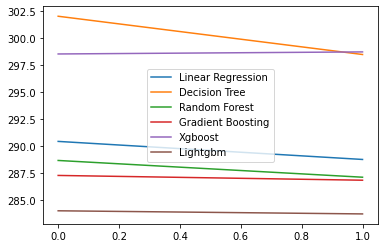

In [70]:
df_score.plot()